In [2]:
import pandas as pd
import seaborn as sns


In [3]:
path = 'C:/Users/Maria/Documents/Netology_python/Diplomnaya_rabota/HR.csv'
hr = pd.read_csv(path)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Расчет основных статистик

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
for i in hr.columns:
    if (i == "department") or (i == "salary"):
        break
    
    else:
        print(i)
        print('__________________')
        print('Mean = ', hr[i].mean())
        print('Median = ', hr[i].median())
        print('Moda = ', hr[i].mode()[0])
        print('Min = ', hr[i].min())
        print('Max = ', hr[i].max())
        print('STD = ', hr[i].std())
        print('__________________')

satisfaction_level
__________________
Mean =  0.6128335222348166
Median =  0.64
Moda =  0.1
Min =  0.09
Max =  1.0
STD =  0.2486306510611418
__________________
last_evaluation
__________________
Mean =  0.7161017401159978
Median =  0.72
Moda =  0.55
Min =  0.36
Max =  1.0
STD =  0.17116911062327592
__________________
number_project
__________________
Mean =  3.80305353690246
Median =  4.0
Moda =  4
Min =  2
Max =  7
STD =  1.2325923553183857
__________________
average_montly_hours
__________________
Mean =  201.0503366891126
Median =  200.0
Moda =  135
Min =  96
Max =  310
STD =  49.943099371284305
__________________
time_spend_company
__________________
Mean =  3.498233215547703
Median =  3.0
Moda =  3
Min =  2
Max =  10
STD =  1.4601362305354546
__________________
Work_accident
__________________
Mean =  0.1446096406427095
Median =  0.0
Moda =  0
Min =  0
Max =  1
STD =  0.3517185523801279
__________________
left
__________________
Mean =  0.2380825388359224
Median =  0.0
Moda =  0
M

# Корреляция

In [34]:
hr.corr('spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


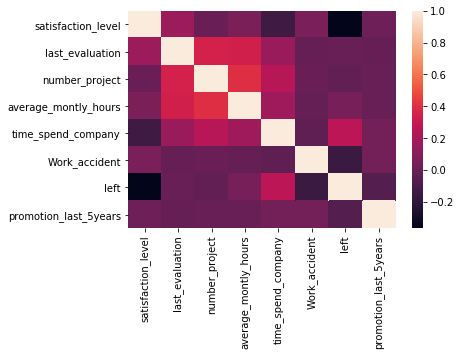

In [35]:
sns.heatmap(hr.corr('spearman'))

две наиболее скореллированные величины - average_montly_hours и number_project (0.397855)
две наименее скоррелированные величины - promotion_last_5years и last_evaluation (-0.007167)

# Расчет кол-ва сотрудников по отделам 

In [9]:
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

# Распределение сотрудников по зарплатам

In [9]:
import matplotlib.pyplot as plt

(array([7316.,    0.,    0.,    0.,    0., 6446.,    0.,    0.,    0.,
        1237.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

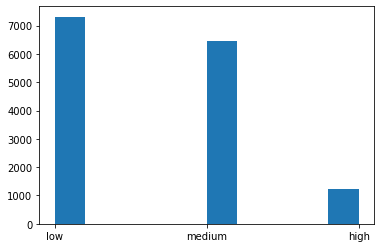

In [10]:
plt.hist(hr.salary)

# Распределение сотрудников по зарплатам в каждом отделе

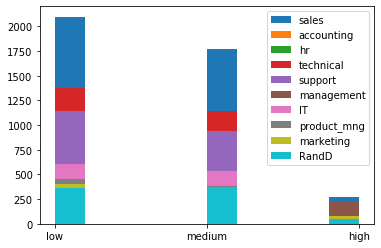

In [27]:
deps = hr['department'].unique()
for i in deps:
    df = hr[hr.department == i]
#     print(i)
    plt.hist(df.salary, label= i)
    plt.legend()

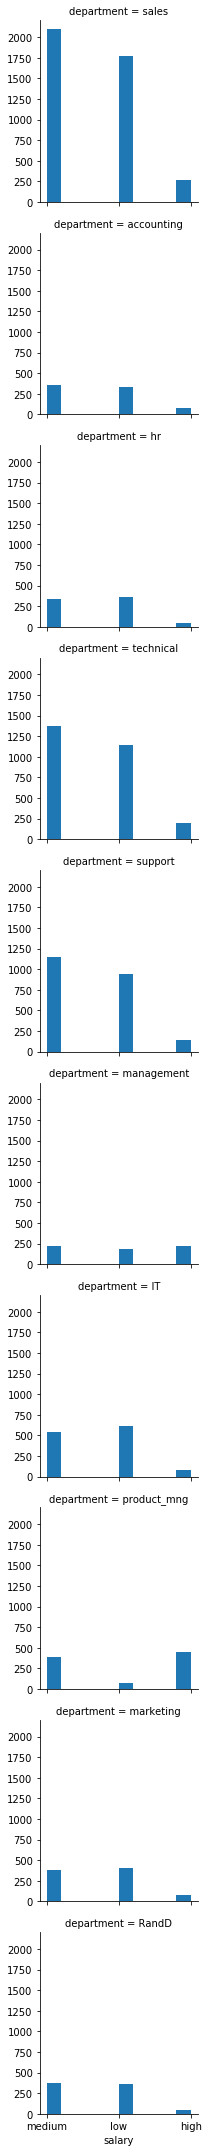

In [78]:
grid = sns.FacetGrid(hr, row="department")
grid.map(plt.hist, "salary")


# Проверка гипотез

Ho: Среднее время на работе сотрудников с High salary >= среднего времени на работе сотрудников с Low salary, те сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

H1: Среднее время на работе сотрудников с High salary < среднего времени на работе сотрудников с Low salary

In [11]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(hr[hr.salary == 'high']['average_montly_hours'].dropna(), hr[hr.salary == 'low']['average_montly_hours'].dropna(), equal_var=False)
print(result)
alpha = 0.05
if (result.statistic <0) & (result.pvalue/2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не можем отвергнуть нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом


# Расчет показателей для уволившихся и не уволившихся сотрудников

In [77]:
print('Сотрудник не уволился, доля повышений за последние 5 лет, %:',hr[hr.left == 0]['promotion_last_5years'].count()/hr['promotion_last_5years'].count()*100)
print('Сотрудник уволился, доля повышений за последние 5 лет, %:',hr[hr.left == 1]['promotion_last_5years'].count()/hr['promotion_last_5years'].count()*100)
print('Сотрудник не уволился, средний уровень удовлетворенности:',hr[hr.left == 0]['satisfaction_level'].mean())
print('Сотрудник уволился, средний уровень удовлетворенности:',hr[hr.left == 1]['satisfaction_level'].mean())
print('Сотрудник не уволился, среднее кол-во проектов:',hr[hr.left == 0]['number_project'].mean())
print('Сотрудник уволился, среднее кол-во проектов:',hr[hr.left == 1]['number_project'].mean())

Сотрудник не уволился, доля повышений за последние 5 лет, %: 76.19174611640777
Сотрудник уволился, доля повышений за последние 5 лет, %: 23.80825388359224
Сотрудник не уволился, средний уровень удовлетворенности: 0.666809590479516
Сотрудник уволился, средний уровень удовлетворенности: 0.44009801176140917
Сотрудник не уволился, среднее кол-во проектов: 3.786664333216661
Сотрудник уволился, среднее кол-во проектов: 3.8555026603192384


# LDA модель

In [70]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
hr_test = hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years' ]]
left = hr.left.values
X_train, X_test, y_train, y_test = train_test_split(hr_test, left, test_size=0.20, random_state=42)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [14]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
result = pd.DataFrame([y_test,y_pred]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, lda.predict(X_test))

0.7533333333333333

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2094,  200],
       [ 540,  166]], dtype=int64)

True positive - 2094 раз модель правильно предсказала, что сотрудник останется, True Negative - 166 раз модель правильно предсказала, что сотрудник уволится, False Negative - 200 раз ошиблась, сотрудник уволился, а модель предсказала, что останется, и False Positive - 540 раза ошиблась, сотрудник остался, а модель пердсказала, что уволится
